In [1]:
import pandas as pd
summ = pd.read_csv('summary_table_v1.4.csv')
raw = pd.read_csv('drugcomb_data_v1.4.csv')

/Users/jarridr/opt/anaconda3/envs/my-rdkit-env/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (2,5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/jarridr/opt/anaconda3/envs/my-rdkit-env/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (5,7,11) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [10]:
cell_line_summary = pd.read_csv('cell_line_summary.csv')
cell_line_summary = cell_line_summary.rename(columns={'cell_line': 'cell_line_name'})

In [59]:
cell_line_summary

,cell_line_name,cell_line_idx,explained variance,synergy_zip_001,synergy_zip_001_found
0,JHH-136,1050,0.351515,98.310585,79.556885
1,NCIH2122,1484,0.402922,33.353739,19.492859
2,TMD8,1872,0.038962,35.413643,18.731087
3,SKMEL30,1705,0.375515,25.355051,18.646862
4,MSTO,1314,0.341867,35.183376,17.795273
...,...,...,...,...,...
94,PC-3,1561,0.260386,19.405663,1.555469
95,NCI/ADR-RES,1482,0.314593,9.218847,1.195980
96,NCI-H522,1453,0.284568,23.249523,0.867799
97,UO-31,1907,0.286173,16.986182,0.671936


In [123]:
mono_summ_exps = summ[summ['drug_col'].isna()]
mono_kbm_exps = mono_summ_exps[mono_summ_exps['cell_line_name'] == 'HT29']
mono_kbm_exps

,block_id,drug_row,drug_col,cell_line_name,conc_r_unit,conc_c_unit,css,synergy_zip,synergy_bliss,synergy_loewe,synergy_hsa,ic50_row,ic50_col,ri_row,ri_col,css_row,css_col,S
466196,466423,NVP-AEW541,NaN,HT29,uM,NaN,20.457,0.0,0.0,0.0,0.0,1.589771,0.0,20.457,0.0,0.0,0.0,0.0
466670,466897,NILOTINIB,NaN,HT29,uM,NaN,4.566,0.0,0.0,0.0,0.0,8.000000,0.0,4.566,0.0,0.0,0.0,0.0
467118,467345,17-AAG (TANESPIMYCIN),NaN,HT29,uM,NaN,70.264,0.0,0.0,0.0,0.0,0.017668,0.0,70.264,0.0,0.0,0.0,0.0
467621,467849,PHA-665752,NaN,HT29,uM,NaN,3.414,0.0,0.0,0.0,0.0,8.000000,0.0,3.414,0.0,0.0,0.0,0.0
468124,468352,LAPATINIB,NaN,HT29,uM,NaN,7.644,0.0,0.0,0.0,0.0,8.000000,0.0,7.644,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796478,796758,crizotinib:PLX-4032 (2:1 mol/mol),NaN,HT29,uM,NaN,24.760,0.0,0.0,0.0,0.0,9.427019,0.0,24.760,0.0,0.0,0.0,0.0
796479,796759,BRD-K27188169:navitoclax (2:1 mol/mol),NaN,HT29,uM,NaN,5.304,0.0,0.0,0.0,0.0,2.512338,0.0,5.304,0.0,0.0,0.0,0.0
796480,796760,BRD-K03536150,NaN,HT29,uM,NaN,-9.163,0.0,0.0,0.0,0.0,7.590175,0.0,-9.163,0.0,0.0,0.0,0.0
796481,796761,BRD-K34222889,NaN,HT29,uM,NaN,8.188,0.0,0.0,0.0,0.0,0.089023,0.0,8.188,0.0,0.0,0.0,0.0


In [9]:
comb_summ_exps = summ[~summ['drug_col'].isna()]
comb_kbm_exps = comb_summ_exps[comb_summ_exps['cell_line_name'] == 'HT29']
comb_kbm_exps

def num_exps_comb_mono(df, cell_line_name):
    cell_line_df = df[df['cell_line_name'] == cell_line_name]
    
    comb_exps = cell_line_df[~cell_line_df['drug_col'].isna()]
    mono_exps = cell_line_df[cell_line_df['drug_col'].isna()]
    
    print('Cell line: %s -- Num comb: %d, num mono: %d' % (cell_line_name, comb_exps.shape[0], mono_exps.shape[0]))
    
lines = ['KBM-7', 'HT29', 'MCF7', 'A375', 'A549', 'VCAP', 'LNCAP', 'NALM-6']
for line in lines:
    num_exps_comb_mono(summ, line)
    

Cell line: KBM-7 -- Num comb: 40160, num mono: 0
Cell line: HT29 -- Num comb: 7695, num mono: 727
Cell line: MCF7 -- Num comb: 5309, num mono: 923
Cell line: A375 -- Num comb: 2416, num mono: 1191
Cell line: A549 -- Num comb: 5252, num mono: 1539
Cell line: VCAP -- Num comb: 2332, num mono: 717
Cell line: LNCAP -- Num comb: 2332, num mono: 0
Cell line: NALM-6 -- Num comb: 0, num mono: 742


/Users/jarridr/opt/anaconda3/envs/my-rdkit-env/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/jarridr/opt/anaconda3/envs/my-rdkit-env/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


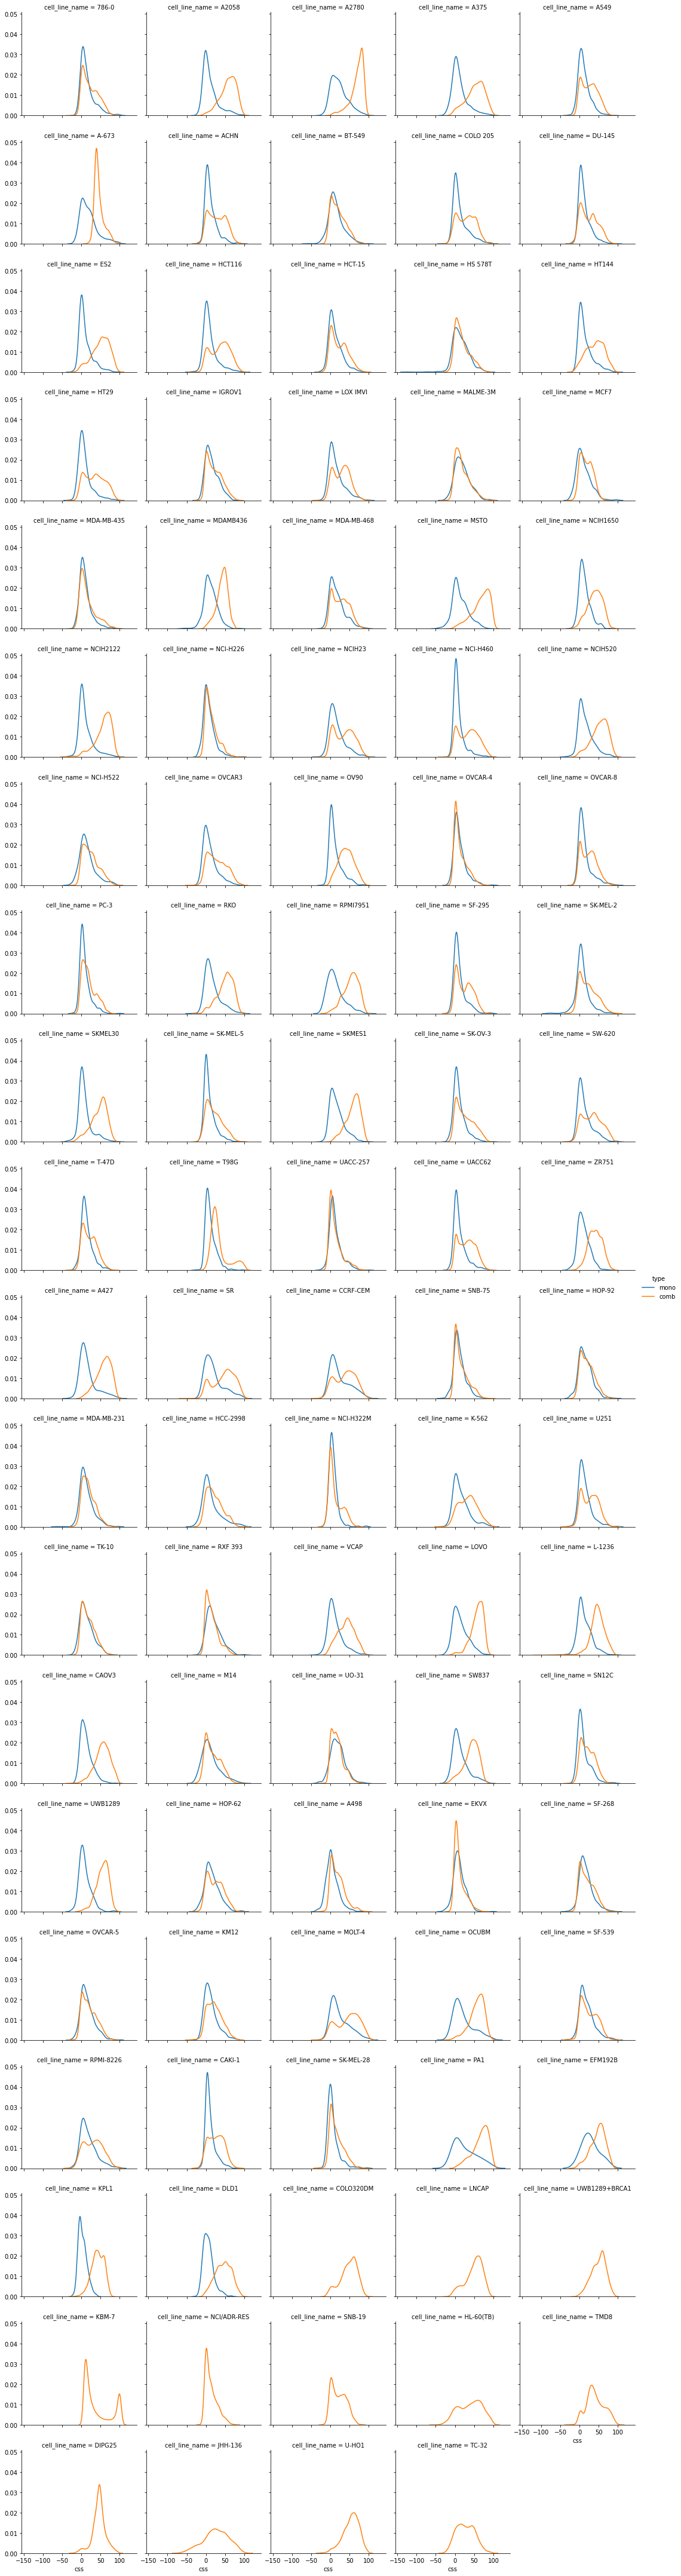

In [67]:
import seaborn as sns

lines = ['MCF7', 'VCAP', 'SW-620', 'T-47D', 'HT29', 'SK-OV-3', 'UACC62']

pertinent_lines = summ[summ['cell_line_name'].isin(lines)]

def plot_facet(df):
    mono = df[df['drug_col'].isna()]
    comb = df[~df['drug_col'].isna()]
    
    mono['type'] = 'mono'
    comb['type'] = 'comb'
    
    both = pd.concat((mono, comb))
    
    g = sns.FacetGrid(both, col='cell_line_name', hue='type', col_wrap=5)
    g.map(sns.kdeplot, 'css')
    g.add_legend()
    
    g.savefig('css_scores_all.png')
    
def extract_top_k_from_summ(k):
    cell_lines = cell_line_counts[cell_line_counts['num_unique_drugs'] > k]['cell_line_name']
    return summ[summ['cell_line_name'].isin(cell_lines)]
    
#plot_facet(extract_top_k_from_summ(120))
good_zip_score_lines = cell_line_summary['cell_line_name']
#plot_facet(summ[summ['cell_line_name'].isin(good_zip_score_lines)])
plot_facet(summ[summ['cell_line_name'].isin(cell_line_summary['cell_line_name'])])

In [6]:
comb = new_summ[~new_summ['drug_col'].isna() & (new_summ['study_name'] == 'ALMANAC')]

row = pd.DataFrame()
col = pd.DataFrame()

row[['cell_line_name', 'drug']] = comb[['cell_line_name', 'drug_col']]
col[['cell_line_name', 'drug']] = comb[['cell_line_name', 'drug_row']]
all_comb_cl_drug = pd.concat((row, col))

In [7]:
def get_uniq_combs(df, study_name=''):
    cell_lines = df['cell_line_name'].to_frame().reset_index().drop(columns=['index']).drop_duplicates()
    if study_name != '':
        df = df[df['study_name'] == study_name]
    
    for_uniq_count = df[['cell_line_name', 'drug_col', 'drug_row']]
    for_uniq_count = for_uniq_count.append(df[['cell_line_name', 'drug_row', 'drug_col']])
    for_uniq_count = for_uniq_count.drop_duplicates()
    
    gb_df = for_uniq_count.groupby('cell_line_name')[['drug_row', 'drug_col']].size().reset_index()
    gb_df = gb_df.rename(columns={0: 'unique_combs_%s' % study_name})
    
    
    zero_val_cell_lines = pd.DataFrame()
    zero_val_cell_lines['cell_line_name'] = cell_lines[~cell_lines['cell_line_name'].isin(gb_df['cell_line_name'])]['cell_line_name']
    zero_val_cell_lines['unique_combs_%s' % study_name] = 0
    
    return gb_df.append(zero_val_cell_lines)

cell_line_counts = all_comb_cl_drug.groupby('cell_line_name')['drug'].nunique().reset_index()
cell_line_counts = cell_line_counts.rename(columns={'drug': 'num_unique_drugs'})
gb = comb.groupby(['cell_line_name', 'drug_row', 'drug_col'])
cell_line_counts = cell_line_counts.merge(get_uniq_combs(comb), on='cell_line_name')
cell_line_counts = cell_line_counts.merge(get_uniq_combs(comb, 'ALMANAC'), on='cell_line_name')
cell_line_counts = cell_line_counts.merge(get_uniq_combs(comb, 'ONEIL'), on='cell_line_name')
cell_line_counts['num_total_experiments'] = comb.groupby('cell_line_name')[['drug_row', 'drug_col']].size().values

In [ ]:
for_uniq_count.groupby('cell_line_name')[['drug_row', 'drug_col']].size()

In [9]:
comb[comb['cell_line_name'] == 'K-562']

,block_id,drug_row,drug_col,cell_line_name,conc_r_unit,conc_c_unit,css,synergy_zip,synergy_bliss,synergy_loewe,synergy_hsa,ic50_row,ic50_col,ri_row,ri_col,css_row,css_col,S,study_name
132369,132370,MERCAPTOPURINE,ANTIBIOTIC AY 22989,K-562,uM,uM,-2.9650,0.669423,-0.251519,-4.418428,-4.495244,0.064536,0.008603,-0.478,-0.035,-2.650,-3.280,-2.4520,ALMANAC
132379,132380,MECHLORETHAMINE HYDROCHLORIDE,CARMUSTINE,K-562,uM,uM,31.2515,0.807662,1.746563,-25.877235,2.048450,5.000000,2.534298,-0.365,10.156,15.879,46.624,21.4605,ALMANAC
132417,132418,AZACYTIDINE,MITOTANE,K-562,uM,uM,26.1540,8.555004,3.180162,11.663305,0.246449,3.000000,8.797651,22.928,-5.570,32.613,19.695,8.7960,ALMANAC
132468,132469,NSC733504,IXABEPILONE,K-562,uM,uM,39.9630,-2.489581,-2.802793,-3.379653,-1.834438,0.000284,0.013755,19.863,54.270,19.721,60.205,-34.1700,ALMANAC
132555,132556,34793-34-5,THALIDOMIDE,K-562,uM,uM,-5.7140,6.279437,6.059441,-4.506323,-5.152221,0.205028,0.374745,-12.851,-1.657,-3.755,-7.673,8.7940,ALMANAC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443042,443043,DOCETAXEL,ADM HYDROCHLORIDE,K-562,uM,uM,31.2320,-6.520474,-7.996441,-6.521318,-4.961038,0.001494,0.193092,15.529,32.875,28.017,34.447,-17.1720,ALMANAC
443088,443089,NAVELBINE DITARTRATE (TN),ADM HYDROCHLORIDE,K-562,uM,uM,39.4535,-2.827830,-0.772357,0.007005,2.371601,0.012312,0.193092,8.928,32.875,40.629,38.278,-2.3495,ALMANAC
443392,443393,SN-38,ADM HYDROCHLORIDE,K-562,uM,uM,40.8310,-8.870802,-11.392074,-5.137099,-3.257587,0.001219,0.193092,49.315,32.875,45.163,36.499,-41.3590,ALMANAC
443393,443394,34793-34-5,ADM HYDROCHLORIDE,K-562,uM,uM,37.7610,0.041375,-1.104376,-23.593023,0.281832,100.000000,0.193092,2.168,32.875,41.319,34.203,2.7180,ALMANAC


In [11]:
cell_line_summary = cell_line_summary.merge(cell_line_counts, on='cell_line_name')

In [12]:
cell_line_summary

,cell_line_name,cell_line_idx,explained variance,synergy_zip_001,synergy_zip_001_found,num_unique_drugs,unique_combs_,unique_combs_ALMANAC,unique_combs_ONEIL,num_total_experiments
0,HL-60(TB),949,0.190944,35.071232,17.445980,103,4932,4932,0,4940
1,HCT-15,927,0.248565,21.864988,16.356529,103,5266,5266,0,5304
2,T-47D,1834,0.395190,22.982843,15.029013,103,5188,5188,0,5218
3,HT29,981,0.278915,25.363180,12.819540,103,5241,5241,0,5279
4,SK-OV-3,1700,0.447145,20.330341,12.681864,103,5259,5259,0,5295
5,SW-620,1797,0.354852,22.306747,11.237446,103,5274,5274,0,5312
6,NCI-H460,1449,0.162762,25.435719,10.384542,103,5195,5195,0,5233
7,SK-MEL-5,1688,0.406180,17.218652,10.250273,103,5209,5209,0,5246
8,K-562,1086,0.170958,25.789259,9.370543,103,5172,5172,0,5209
9,RPMI-8226,1622,0.296788,28.963688,9.025938,103,5037,5037,0,5072


In [27]:
cell_line_summary.sort_values('num_unique_drugs', ascending=False)

,cell_line_name,cell_line_idx,explained variance,synergy_zip_001,synergy_zip_001_found,num_unique_drugs,unique_combs_,unique_combs_ALMANAC,unique_combs_ONEIL,num_total_experiments
85,DIPG25,773,-0.145429,28.930962,2.691987,2443,6668,0,0,6969
63,A-673,557,-10.740038,11.633110,5.331691,1874,1873,0,0,1875
39,L-1236,1187,-6.356998,159.694946,8.159618,1868,2340,0,0,2365
66,T98G,1841,-14.438506,67.739449,4.995907,1818,1818,0,0,1818
2,TMD8,1872,0.038962,35.413643,18.731087,484,991,0,0,1181
...,...,...,...,...,...,...,...,...,...,...
26,A375,563,0.234817,29.564974,10.253649,38,583,0,583,2416
24,DLD1,776,0.294541,21.022650,11.099625,38,583,0,583,2332
23,CAOV3,681,0.271888,26.511420,11.112454,38,583,0,583,2416
22,VCAP,1913,0.292374,22.463167,11.203102,38,583,0,583,2332


In [14]:
good_zips = comb.groupby('cell_line_name')['synergy_zip'].apply(lambda x: (x > 25.).mean()).reset_index().rename(columns={'synergy_zip': 'zip_above_25_prop'})

In [15]:
cell_line_summary = cell_line_summary.merge(good_zips, on='cell_line_name') 

In [53]:
cell_line_summary = cell_line_summary.sort_values('zip_above_25_prop', ascending=False)
cell_line_summary[cell_line_summary['zip_above_25_prop'] > .01]

,cell_line_name,cell_line_idx,explained variance,synergy_zip_001,synergy_zip_001_found,num_unique_drugs,unique_combs_,unique_combs_ALMANAC,unique_combs_ONEIL,num_total_experiments,zip_above_25_prop
98,JHH-136,1050,0.351515,98.310585,79.556885,31,454,0,0,698,0.421203
3,T98G,1841,-14.438506,67.739449,4.995907,1818,1818,0,0,1818,0.156216
2,L-1236,1187,-6.356998,159.694946,8.159618,1868,2340,0,0,2365,0.109514
66,U-HO1,1894,0.145746,41.931953,16.826408,94,2940,0,0,4229,0.061717
4,TMD8,1872,0.038962,35.413643,18.731087,484,991,0,0,1181,0.046571
93,MSTO,1314,0.341867,35.183376,17.795273,38,583,0,583,2332,0.040309
5,KBM-7,1098,0.064012,55.223415,-0.706574,283,40041,0,0,40160,0.031574
85,A2058,560,0.249733,34.125107,14.248819,38,583,0,583,2416,0.020695
67,TC-32,1844,0.070611,35.844013,14.336246,63,1689,0,0,1857,0.019386
33,HL-60(TB),949,0.190944,35.071232,17.445980,103,4932,4932,0,4940,0.013563


In [16]:
from IPython.display import HTML, display
import tabulate

new_lines = ['KBM-7', 'A549', 'HT29', 'MCF7', 'A375', 'VCAP', 'LNCAP']
other_new_lines = ['UACC62', 'SW-620', 'SK-OV-3', 'HT29', 'T-47D', 'MCF7', 'VCAP']
def make_table(df):
    result = [['Cell Line Name', 'Explained Variance', 'Top 1% ZIP', 'Top 1% ZIP Found', 'Num Unique Drugs', 'Num Combinations Experiments', 'Num Unique Combinations', 'Num Unique Combs in ALMANAC', 'Num Unique Combs in ONEIL', 'Prop zip over 25']]
    for line in df['cell_line_name']:
        inner_res = [line]

        this_series = df[df['cell_line_name'] == line].squeeze()

        inner_res.append(this_series['explained variance'])
        inner_res.append(this_series['synergy_zip_001'])
        inner_res.append(this_series['synergy_zip_001_found'])
        inner_res.append(this_series['num_unique_drugs'])
        inner_res.append(this_series['num_total_experiments'])
        inner_res.append(this_series['unique_combs_'])
        inner_res.append(this_series['unique_combs_ALMANAC'])
        inner_res.append(this_series['unique_combs_ONEIL'])
        inner_res.append(this_series['zip_above_25_prop'])
        
        result.append(inner_res)

    display(HTML(tabulate.tabulate(result, tablefmt='html')))
    
cell_line_summary.to_csv('augmented_cell_line_summary.csv')
cell_line_counts = cell_line_counts.sort_values(by=['num_unique_drugs'], ascending=False)
#cell_line_summary = cell_line_summary.sort_values('num_unique_drugs', ascending=False)
make_table(cell_line_summary)
#make_table(cell_line_counts[cell_line_counts['num_unique_drugs'] > 120])
#make_table(cell_line_counts[cell_line_counts['cell_line_name'].isin(new_lines)])
#make_table(cell_line_counts[cell_line_counts['cell_line_name'].isin(other_new_lines)])

Cell Line Name,Explained Variance,Top 1% ZIP,Top 1% ZIP Found,Num Unique Drugs,Num Combinations Experiments,Num Unique Combinations,Num Unique Combs in ALMANAC,Num Unique Combs in ONEIL,Prop zip over 25
HL-60(TB),0.19094437869925684,35.071231842041016,17.445980072021484,103,4940,4932,4932,0,0.013562753036437248
HCT-15,0.2485652293299091,21.864988327026367,16.356529235839847,103,5304,5266,5266,0,0.0026395173453996985
T-47D,0.39519014187015344,22.98284339904785,15.029012680053713,103,5218,5188,5188,0,0.0011498658489842851
HT29,0.27891493216771257,25.36318016052246,12.819539546966553,103,5279,5241,5241,0,0.004735745406326956
SK-OV-3,0.4471454302444159,20.330341339111328,12.681863784790039,103,5295,5259,5259,0,0.00018885741265344664
SW-620,0.3548519318864015,22.30674743652344,11.237446308135986,103,5312,5274,5274,0,0.002447289156626506
NCI-H460,0.16276156217864324,25.435718536376953,10.384541988372805,103,5233,5195,5195,0,0.006688324097076247
SK-MEL-5,0.4061801469531083,17.21865177154541,10.25027322769165,103,5246,5209,5209,0,0.0013343499809378575
K-562,0.17095758879725975,25.78925895690918,9.370542526245117,103,5209,5172,5172,0,0.006335189095795738
RPMI-8226,0.2967880365460753,28.96368789672852,9.025938034057617,103,5072,5037,5037,0,0.007294952681388012


In [9]:
from IPython.display import HTML, display
import tabulate

def get_num_uniq_drugs(df):
    row = df['drug_row']
    col = df['drug_col']
    
    both = pd.concat((row, col))
    return both.unique().shape[0]

result = [['Drug Name', 'Num Unique Drugs', 'Num Combinations']]
for line in lines:
    inner_res = [line]
    
    df = pertinent_lines[pertinent_lines['cell_line_name'] == line]
    df = df[~df['drug_col'].isna()]
    
    inner_res.append(get_num_uniq_drugs(df))
    inner_res.append(df.shape[0])
        
    result.append(inner_res)

display(HTML(tabulate.tabulate(result, tablefmt='html')))

NameError: name 'lines' is not defined

In [182]:
def get_score_type_df(df):
    for score_name in ['css', 'synergy_hsa', 'synergy_zip']:
        

Drug Name,Num Unique Drugs,Num Combinations
KBM-7,283,40160
HT29,127,7695
MCF7,103,5309
A375,38,2416
A549,103,5252
VCAP,38,2332
LNCAP,38,2332
NALM-6,0,0


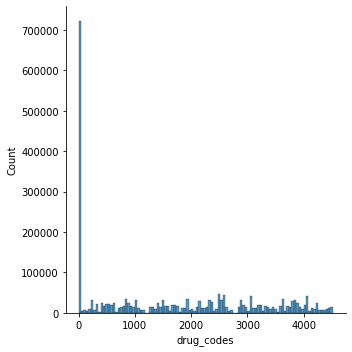

In [25]:
import seaborn as sns

row = pd.DataFrame()
col = pd.DataFrame()

row['drug'] = summ['drug_row']
col['drug'] = summ['drug_col']
both = pd.concat((row, col))

both['drug'] = pd.Categorical(both['drug'])
both['drug_codes'] = both['drug'].cat.codes

sns.displot(data=both, x='drug_codes')

In [133]:
raw['study_name'].unique()

array(['ONEIL', 'CLOUD', 'ALMANAC', 'FORCINA', 'NCATS_ATL', 'Mathews',
       'NCATS_DIPG', 'NCATS_ES(FAKi/AURKi)', 'NCATS_ES(Nampt+PARP)',
       'Wilson', 'NCATS_HL', 'Yohe', 'NCATS_2D_3D', 'Phelan',
       'NCATS_MDR_CS', 'CCLE', 'CTRPv2', 'FIMM', 'gCSI', 'GDSC1', 'GRAY',
       'UHNBreast', 'BEATAML'], dtype=object)

In [21]:
summ['synergy_hsa'].max()

84.3114116374778

In [7]:
print(raw['block_id'].shape)
print(raw['block_id'].unique().shape)

(17271848,)
(1175220,)


In [3]:
block_to_study = raw[['block_id', 'study_name']]

In [4]:
block_to_study = block_to_study.drop_duplicates()

In [5]:
new_summ = summ.merge(block_to_study, on='block_id')
val = new_summ

In [234]:
broad_data = new_summ[new_summ['study_name'] == 'CTRPv2']

print('Num combination experiments in broad dataset: %d' % broad_data[~broad_data['drug_col'].isna()].shape[0])
print('Num monotherapy experiments in broad dataset: %d' % broad_data[broad_data['drug_col'].isna()].shape[0])

Num combination experiments in broad dataset: 0
Num monotherapy experiments in broad dataset: 395263


In [23]:
print(new_summ[new_summ['study_name'] == 'ALMANAC'].shape)
print(new_summ[new_summ['study_name'] == 'ONEIL'].shape)

print(new_summ[new_summ['study_name'] == 'ALMANAC']['cell_line_name'].unique().shape)

(311604, 19)
(92208, 19)
(60,)


In [148]:
gb=new_summ.groupby(['drug_row', 'drug_col', 'cell_line_name'])
gb['study_name'].apply(list)

drug_row          drug_col               cell_line_name
(+)-BICUCULLINE   TEMOZOLOMIDE           T98G                           [FORCINA]
(+)-Blebbistatin  (+)-JQ1                TMD8                           [Mathews]
                  IBRUTINIB (PCI-32765)  TMD8                           [Mathews]
(+)-JQ1           (+)-JQ1                RD                                [Yohe]
                                         SMS-CTR                           [Yohe]
                                                                    ...          
xylometazoline    RUXOLITINIB            L-1236                        [NCATS_HL]
yc-1              717906-29-1            A-673             [NCATS_ES(FAKi/AURKi)]
                  MARIZOMIB              DIPG25                      [NCATS_DIPG]
                  PANOBINOSTAT           DIPG25                      [NCATS_DIPG]
                  RUXOLITINIB            L-1236                        [NCATS_HL]
Name: study_name, Length: 391373, dtype: o

In [149]:
val = new_summ[new_summ.duplicated(subset=['drug_row', 'drug_col', 'cell_line_name', 'study_name'], keep=False)]
both_pre = val.groupby(['drug_row', 'drug_col'])['study_name'].apply(list).reset_index()
both_pre

,drug_row,drug_col,study_name
0,(+)-JQ1,(+)-JQ1,"[Mathews, Mathews, Mathews, Mathews]"
1,(+)-JQ1,10356-76-0,"[NCATS_ES(Nampt+PARP), NCATS_ES(Nampt+PARP)]"
2,(+)-JQ1,128517-07-7,"[NCATS_ES(Nampt+PARP), NCATS_ES(Nampt+PARP)]"
3,(+)-JQ1,200484-11-3,"[NCATS_ES(Nampt+PARP), NCATS_ES(Nampt+PARP)]"
4,(+)-JQ1,71555-25-4,"[NCATS_ES(Nampt+PARP), NCATS_ES(Nampt+PARP)]"
...,...,...,...
2110,thapsigargin,MARIZOMIB,"[NCATS_DIPG, NCATS_DIPG]"
2111,thapsigargin,PANOBINOSTAT,"[NCATS_DIPG, NCATS_DIPG]"
2112,thapsigargin,beta-Narcotine,"[NCATS_DIPG, NCATS_DIPG, NCATS_DIPG, NCATS_DIPG]"
2113,thapsigargin,thapsigargin,"[NCATS_ES(Nampt+PARP), NCATS_ES(Nampt+PARP), N..."


In [139]:
both_pre['study_name']

0                    [Mathews, Mathews, Mathews, Mathews]
1            [NCATS_ES(Nampt+PARP), NCATS_ES(Nampt+PARP)]
2            [NCATS_ES(Nampt+PARP), NCATS_ES(Nampt+PARP)]
3            [NCATS_ES(Nampt+PARP), NCATS_ES(Nampt+PARP)]
4            [NCATS_ES(Nampt+PARP), NCATS_ES(Nampt+PARP)]
                              ...                        
2110                             [NCATS_DIPG, NCATS_DIPG]
2111                             [NCATS_DIPG, NCATS_DIPG]
2112     [NCATS_DIPG, NCATS_DIPG, NCATS_DIPG, NCATS_DIPG]
2113    [NCATS_ES(Nampt+PARP), NCATS_ES(Nampt+PARP), N...
2114    [Mathews, Mathews, Mathews, Mathews, Mathews, ...
Name: study_name, Length: 2115, dtype: object

In [140]:
oneil_vals = val[val['study_name'] == 'ONEIL']
oneil_vals.groupby(['drug_row', 'drug_col', 'cell_line_name', 'study_name'])['css'].std()

almanac_vals = val[val['study_name'] == 'ALMANAC']
almanac_vals.groupby(['drug_row', 'drug_col', 'cell_line_name', 'study_name'])['css'].std()

drug_row                                                                              drug_col           cell_line_name  study_name
1-(5-DEOXYPENTOFURANOSYL)-5-FLUORO-4-{[(PENTYLOXY)CARBONYL]AMINO}PYRIMIDIN-2(1H)-ONE  ADM HYDROCHLORIDE  786-0           ALMANAC       10.075211
                                                                                                         A498            ALMANAC       33.574137
                                                                                                         A549            ALMANAC       20.315531
                                                                                                         ACHN            ALMANAC       18.169109
                                                                                                         BT-549          ALMANAC        9.367397
                                                                                                                                         ...   

In [142]:
almanac_vals[['drug_row', 'drug_col', 'cell_line_name', 'study_name']].drop_duplicates()

,drug_row,drug_col,cell_line_name,study_name
132425,CELECOXIB,ADM HYDROCHLORIDE,OVCAR3,ALMANAC
132460,CYTARABINE HYDROCHLORIDE,ADM HYDROCHLORIDE,SF-539,ALMANAC
132619,LAPATINIB,ADM HYDROCHLORIDE,OVCAR-4,ALMANAC
132639,DOCETAXEL,ADM HYDROCHLORIDE,U251,ALMANAC
132776,ANTIBIOTIC AY 22989,ADM HYDROCHLORIDE,NCI-H322M,ALMANAC
...,...,...,...,...
442462,ADM HYDROCHLORIDE,NSC256439,SK-MEL-5,ALMANAC
442485,ADM HYDROCHLORIDE,NSC256439,HCT-15,ALMANAC
442599,ADM HYDROCHLORIDE,NSC256439,M14,ALMANAC
443408,ADM HYDROCHLORIDE,NSC256439,MCF7,ALMANAC


In [81]:
x = summ.merge(block_to_study, on='block_id')
x = x[x['study_name'] == 'ALMANAC']
(x.groupby(['drug_row', 'drug_col', 'cell_line_name']).size() > 1).sum()


2091

In [49]:
gb.size().sort_values(ascending=False)

drug_row         drug_col               cell_line_name
PRALATREXATE     IBRUTINIB (PCI-32765)  TMD8              10
METHOTREXATE     IBRUTINIB (PCI-32765)  TMD8              10
SUNITINIB        MK-2206                NCIH2122           8
TEMOZOLOMIDE     MK-4827                EFM192B            8
GEMCITABINE      AZD1775                NCIH2122           8
                                                          ..
OLMESARTAN       ENDOXIFEN              KBM-7              1
                 ENOXACIN               KBM-7              1
                 ENTACAPONE             KBM-7              1
                 ETHINYL ESTRADIOL      KBM-7              1
(+)-BICUCULLINE  TEMOZOLOMIDE           T98G               1
Length: 391373, dtype: int64

In [17]:
combos = gb.size() 

In [18]:
combos[combos > 1].sum()

409531

In [19]:
def uniq_vals_x_many_reps(x):
    more_than_one = combos[combos > x].sort_values(ascending=False)
    drugs_and_studies = more_than_one.axes[0].to_frame()
    print(drugs_and_studies['study_name'].unique())
    return drugs_and_studies

In [21]:
uniq_vals_x_many_reps(2)

KeyError: 'study_name'

In [18]:
oneil_vals = val[val['study_name'] == 'ONEIL']
oneil_stds = oneil_vals.groupby(['drug_row', 'drug_col', 'cell_line_name', 'study_name'])['css'].std()

almanac_vals = val[val['study_name'] == 'ALMANAC']
almanac_stds = almanac_vals.groupby(['drug_row', 'drug_col', 'cell_line_name', 'study_name'])['css'].std()

two_study_vals = val[(val['study_name'] == 'ALMANAC') | (val['study_name'] == 'ONEIL')]
two_study_gb = two_study_vals.groupby(['drug_row', 'drug_col', 'cell_line_name', 'study_name'])

In [19]:
stds = two_study_gb.std().reset_index()
stds['study_name']

0         ALMANAC
1         ALMANAC
2         ALMANAC
3         ALMANAC
4         ALMANAC
           ...   
332245    ALMANAC
332246    ALMANAC
332247    ALMANAC
332248    ALMANAC
332249    ALMANAC
Name: study_name, Length: 332250, dtype: object

In [26]:
def plot(df, study_name):
    import seaborn as sns
    if study_name != 'Both':
        df = df[df['study_name'] == study_name]
        
    vals = df['css']
    v = sns.kdeplot(data=vals)
    v.set(xlabel='Std', ylabel='Density', title='Std for %s' % study_name)
    import matplotlib.pyplot as plt
    plt.show()
    print('Mean std for replicates in %s was %d' % (study_name, vals.mean()))


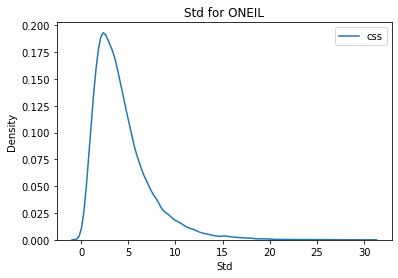

Mean std for replicates in ONEIL was 4


In [82]:
plot(stds, 'ONEIL')

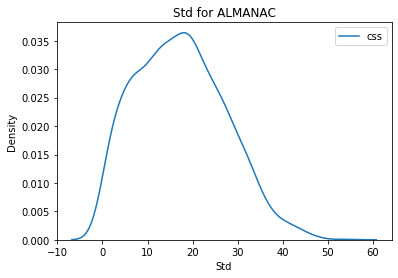

Mean std for replicates in ALMANAC was 17


In [83]:
plot(stds, 'ALMANAC')

<AxesSubplot:xlabel='css', ylabel='Density'>

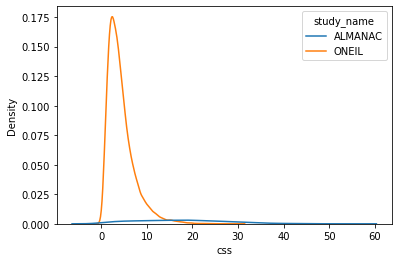

In [20]:
sns.kdeplot(data=stds, x='css', hue='study_name')

In [66]:
cols = ['drug_row', 'drug_col', 'cell_line_name']
intersect_combs=oneil_vals[cols].merge(almanac_vals[cols], on=cols).drop_duplicates()
oneil_vals[cols].merge(almanac_vals[cols], on=cols)
oneil_vals[cols]

,drug_row,drug_col,cell_line_name
0,5-FU,ABT-888,A2058
1,5-FU,ABT-888,A2058
2,5-FU,ABT-888,A2058
3,5-FU,ABT-888,A2058
4,5-FU,AZD1775,A2058
...,...,...,...
92203,TEMOZOLOMIDE,MK-4827,SW-620
92204,TEMOZOLOMIDE,MK-8776,SW-620
92205,TEMOZOLOMIDE,MK-8776,SW-620
92206,TEMOZOLOMIDE,MK-8776,SW-620


In [67]:
almanac_vals[cols]

,drug_row,drug_col,cell_line_name
132425,CELECOXIB,ADM HYDROCHLORIDE,OVCAR3
132460,CYTARABINE HYDROCHLORIDE,ADM HYDROCHLORIDE,SF-539
132619,LAPATINIB,ADM HYDROCHLORIDE,OVCAR-4
132639,DOCETAXEL,ADM HYDROCHLORIDE,U251
132776,ANTIBIOTIC AY 22989,ADM HYDROCHLORIDE,NCI-H322M
...,...,...,...
443950,BENDAMUSTINE HYDROCHLORIDE,ADM HYDROCHLORIDE,OVCAR-8
443952,ZOLEDRONIC ACID,ADM HYDROCHLORIDE,SF-539
443962,NSC733504,ADM HYDROCHLORIDE,SF-539
443965,DASATINIB,ADM HYDROCHLORIDE,SF-539


In [55]:
both_vals = pd.concat((oneil_vals, almanac_vals))
intersect_vals = both_vals.merge(intersect_combs, on=cols)
intersect_gb = intersect_vals.groupby(cols).std().reset_index()
intersect_gb

,drug_row,drug_col,cell_line_name,block_id,css,synergy_zip,synergy_bliss,synergy_loewe,synergy_hsa,ic50_row,ic50_col,ri_row,ri_col,css_row,css_col,S


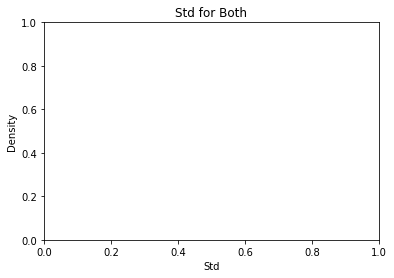

ValueError: cannot convert float NaN to integer

In [56]:
plot(intersect_gb, 'Both')

In [95]:
exp_vars_oneil = oneil_vals.groupby(['drug_col', 'drug_row', 'cell_line_name'])['css'].apply(lambda x: (x.var() - ((x - x.mean()) ** 2 / x.shape) / x.var()))

SyntaxError: invalid syntax (<ipython-input-95-123b633560e9>, line 1)

In [89]:
exp_vars_oneil

0          9.120056
1          9.321536
2          9.240573
3          8.892754
4          4.394198
            ...    
92203     75.137748
92204    199.664630
92205    199.674718
92206    199.635593
92207    199.319401
Name: css, Length: 92208, dtype: float64

In [90]:
on_gb_css = oneil_vals.groupby(['drug_col', 'drug_row', 'cell_line_name'])['css']

In [106]:
in_ndarray = on_gb_css.apply(list).apply(np.array)

In [120]:
on_gb_ndarray = in_ndarray.reset_index()
on_gb_ndarray
v=on_gb_ndarray['css'].apply(lambda x: (x.var() - ((x - x.mean()) ** 2).mean()) / x.var())

In [121]:
v.max()

0.0

In [122]:
v.min()

0.0

In [123]:
oneil_vals['css'].var()

473.7650400436725

In [125]:
(oneil_vals['css'].var() - 4.25) / oneil_vals['css'].var() 

0.991029308537396

In [127]:
(almanac_vals['css'].var() - 17) / almanac_vals['css'].var()

0.9524025453875932

In [129]:
v = new_summ[new_summ['study_name'] == 'ALMANAC'][['drug_row', 'drug_col', 'cell_line_name']]

In [130]:
v.duplicated(keep=False).sum()

4182

In [92]:
pre_3d_plt = summ.merge(block_to_study, on='block_id')
pre_3d_plt = pre_3d_plt[['drug_row', 'drug_col', 'cell_line_name', 'study_name', 'css']]

pre_3d_plt['cell_line_name_str'] = pre_3d_plt['cell_line_name']
pre_3d_plt['cell_line_name'] = pd.Categorical(pre_3d_plt['cell_line_name'])
pre_3d_plt['cell_line_name'] = pre_3d_plt['cell_line_name'].cat.codes
pre_3d_plt['str_study_name'] = pre_3d_plt['study_name']
pre_3d_plt['study_name'] = pd.Categorical(pre_3d_plt['study_name'])
pre_3d_plt['study_name'] = pre_3d_plt['study_name'].cat.codes

comb_summ = pre_3d_plt[~pre_3d_plt['drug_col'].isna()]
mono_summ = pre_3d_plt[pre_3d_plt['drug_col'].isna()]

In [94]:
comb_summ[comb_summ['cell_line_name_str'] == 'KBM-7']

,drug_row,drug_col,cell_line_name,study_name,css,cell_line_name_str,str_study_name
92208,RAMELTEON,BRETYLIUM TOSYLATE,1098,3,7.221595,KBM-7,CLOUD
92209,3-AMINO-2-OXAZOLIDINONE,METYROSINE,1098,3,7.221595,KBM-7,CLOUD
92210,GABAPENTIN,RUFINAMIDE,1098,3,7.221595,KBM-7,CLOUD
92211,FEBUXOSTAT,DUTASTERIDE,1098,3,7.221595,KBM-7,CLOUD
92212,PRAMIPEXOLE,VALPROIC ACID,1098,3,7.221595,KBM-7,CLOUD
...,...,...,...,...,...,...,...
132363,ACETOHYDROXAMIC ACID,SODIUM DIETHYLDITHIOCARBAMATE TRIHYDRATE,1098,3,99.231595,KBM-7,CLOUD
132364,ZONISAMIDE,DIAZOXIDE,1098,3,99.231595,KBM-7,CLOUD
132365,FOSFOMYCIN,HALOFANTRINE,1098,3,99.231595,KBM-7,CLOUD
132366,AMODIAQUINE,HYDROXYUREA,1098,3,99.231595,KBM-7,CLOUD


In [93]:
matching_k = []

for name in mono_summ['cell_line_name_str'].unique():
    if name[0] == 'k' or name[0] == 'K':
        matching_k.append(name)
        
matching_k

['K029AX',
 'KALS-1',
 'Karpas-299',
 'Karpas-422',
 'Karpas-620',
 'Kasumi-2',
 'KCI-MOH1',
 'KCL-22',
 'KE-39',
 'KE-97',
 'Kelly',
 'KG-1',
 'KHM-1B',
 'KLE',
 'KMBC-2',
 'KMM-1',
 'KMRC-1',
 'KMRC-2',
 'KMS-11',
 'KMS-12-BM',
 'KMS-26',
 'KMS-34',
 'KNS-42',
 'KNS-60',
 'KNS-62',
 'KNS-81-FD',
 'KO52',
 'KP-1N',
 'KP-1NL',
 'KP-2',
 'KP-3',
 'KP-4',
 'KP-N-SI9s',
 'Ku812',
 'Kuramochi',
 'KYM-1',
 'KYSE-140',
 'KYSE-150',
 'KYSE-180',
 'KYSE-30',
 'KYSE-410',
 'KYSE-450',
 'KYSE-510',
 'KYSE-520',
 'KYSE-70',
 'Kasumi-3',
 'KMOE-2',
 'KTCTL-13',
 'K-562',
 'KYSE-220',
 'Kasumi-1',
 'KTCTL-26A',
 'KM-H2',
 'KTCTL-140',
 'K4IM',
 'KG-1-C',
 'KYSE-50',
 'KYAE-1',
 'KOSC-2',
 'KU-19-19',
 'KON',
 'K5',
 'KP-N-YS',
 'KP-N-RT-BM-1',
 'KP-N-YN',
 'KINGS-1',
 'K8 [Human melanoma]',
 'KS-1 [Human glioblastoma]',
 'KY821',
 'Karpas-45',
 'KGN',
 'K2 [Human thyroid carcinoma]',
 'KYSE-270',
 'KM12',
 'KE-37',
 'KMH-2',
 'Karpas-231',
 'KTCTL-1M',
 'KOPN-8',
 'KMRC-20',
 'KTCTL-21',
 'K19',
 '

In [71]:
print(comb_summ[comb_summ['str_study_name'] == 'ALMANAC'].shape)
print(comb_summ[comb_summ['str_study_name'] == 'ONEIL'].shape)

def get_num_uniq_drugs(df):
    row = df['drug_row']
    col = df['drug_col']
    
    both = pd.concat((row, col))
    return both.unique().shape[0]

print(get_num_uniq_drugs(comb_summ[comb_summ['str_study_name'] == 'ALMANAC']))
print(get_num_uniq_drugs(comb_summ[comb_summ['str_study_name'] == 'ONEIL']))
print(get_num_uniq_drugs(comb_summ))
print(get_num_uniq_drugs(comb_summ[comb_summ['cell_line_name_str'] == 'KBM-7']))

(311604, 7)
(92208, 7)
(103,)
(38,)
(4150,)
(283,)


791


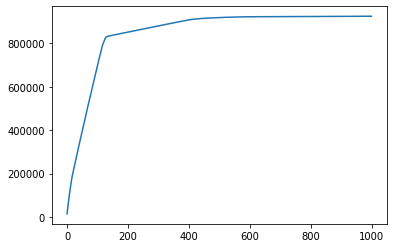

In [264]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def plot_drug_count_hist(df):
    row = pd.DataFrame()
    col = pd.DataFrame()

    row['drug'] = df['drug_row']
    col['drug'] = df['drug_col']
    both = pd.concat((row, col))

    both['drug'] = pd.Categorical(both['drug'])
    both['drug_codes'] = both['drug'].cat.codes
    
    print((both['drug'].value_counts() < 2).sum())
    
    sorted_counts = sorted(both['drug'].value_counts(), reverse=True)[:1000]
    plt.plot(np.cumsum(sorted_counts))   
    #plt.xticks(np.arange(0, 1000, 100))
    #plt.show()
    #ax = sns.countplot(data=both, x='drug_codes', order=both['drug_codes'].value_counts().index)
    #for ind, label in enumerate(ax.get_xticklabels()):
     #   if ind % 500 == 0:  # every 10th label is kept
      #      label.set_visible(True)
       # else:
        #    label.set_visible(False)
            
 #   plt.show()

plot_drug_count_hist(comb_summ)
#plot_drug_count_hist(comb_summ[(comb_summ['str_study_name'] == 'ALMANAC')])
#plot_drug_count_hist(comb_summ[(comb_summ['str_study_name'] == 'ONEIL')])

#plot_drug_count_hist(comb_summ[(comb_summ['str_study_name'] != 'ALMANAC')])

In [39]:
not_al_or_on = comb_summ[(comb_summ['str_study_name'] != 'ALMANAC') & (comb_summ['str_study_name'] != 'ONEIL')]
get_num_uniq_drugs(not_al_or_on)

In [86]:
mono_summ[mono_summ['cell_line_name_str'] == 'KBM-7']

,drug_row,drug_col,cell_line_name,study_name,css,cell_line_name_str,str_study_name,type


In [18]:
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.tri as mtri

def make_fig(df):
    ndf = df[df['css'] > 0]
    tri = mtri.Triangulation(ndf['cell_line_name'], ndf['study_name'])
    zi = mtri.CubicTriInterpolator(tri, ndf['css'], kind='min_E')
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot_trisurf(ndf['cell_line_name'], ndf['study_name'], zi(ndf['cell_line_name'], ndf['study_name']),cmap=plt.cm.viridis, linewidth=.02)
    plt.show()


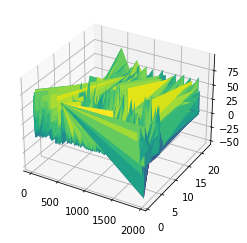

In [19]:
make_fig(mono_summ)

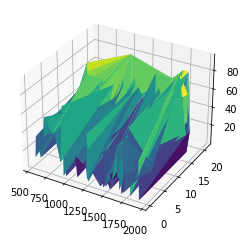

In [20]:
make_fig(comb_summ)

In [84]:
import seaborn as sns

mono_summ['type'] = 'mono'
comb_summ['type'] = 'comb'

cols = ['type', 'cell_line_name_str', 'css']
both_summ = pd.concat((mono_summ[cols], comb_summ[cols]))
both_summ
both_summ[both_summ['cell_line_name_str'] == 'KBM-7']['type'].unique()

/Users/jarridr/opt/anaconda3/envs/my-rdkit-env/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/jarridr/opt/anaconda3/envs/my-rdkit-env/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


array(['comb'], dtype=object)

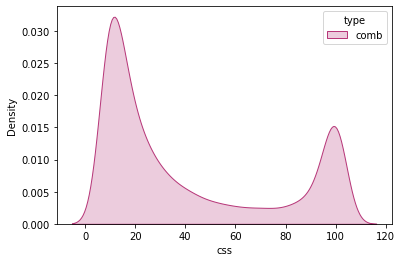

In [82]:
sns.kdeplot(data=both_summ[both_summ['cell_line_name_str'] == 'KBM-7'], x='css', hue='type', fill=True, palette='magma')

In [26]:
print(mono_summ.shape)
print(comb_summ.shape)

(709187, 6)
(466033, 6)


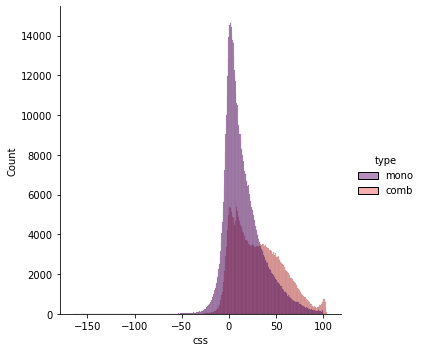

In [35]:
sns.displot(data=both_summ, x='css', hue='type', palette='magma')

In [51]:
import numpy as np

sum_vals = comb_summ.groupby(['drug_row', 'drug_col', 'cell_line_name'])['css'].apply(list).apply(np.array).reset_index()
total_vars = sum_vals['css'].apply(lambda x: x.var() * x.shape[0])

In [48]:
in_sample_vars = total_vars.sum()
all_var = comb_summ.shape[0] * comb_summ['css'].var()

In [49]:

inable_var = (all_var - in_sample_vars) / all_var

In [46]:
explainable_var

0.9862756687115727

In [47]:
sum_vars['css']

0         [21.829122568038503]
1          [7.252000000000001]
2                    [42.4615]
3         [34.111999999999995]
4                    [46.8865]
                  ...         
391368               [52.6085]
391369    [43.571999999999996]
391370                [50.727]
391371               [35.3205]
391372               [61.3935]
Name: css, Length: 391373, dtype: object

In [58]:
comb_vals_for_cl = comb_summ.groupby(['cell_line_name'])['css'].apply(list).apply(np.array).reset_index()
mono_vals_for_cl = mono_summ.groupby(['cell_line_name'])['css'].apply(list).apply(np.array).reset_index()

<AxesSubplot:xlabel='css', ylabel='Density'>

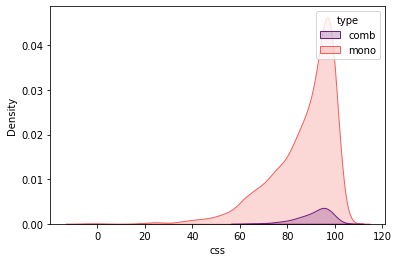

In [79]:
max_comb_css = comb_vals_for_cl['css'].apply(lambda x: x.max()).to_frame()
max_mono_css = mono_vals_for_cl['css'].apply(lambda x: x.max()).to_frame()

max_comb_css['type'] = 'comb'
max_mono_css['type'] = 'mono'

both_max = pd.concat((max_comb_css, max_mono_css))
sns.kdeplot(data=both_max, x='css', hue='type', fill=True, palette='magma')

In [75]:
max_mono_css['css'].mean()

86.50253499222387

<AxesSubplot:xlabel='css', ylabel='Density'>

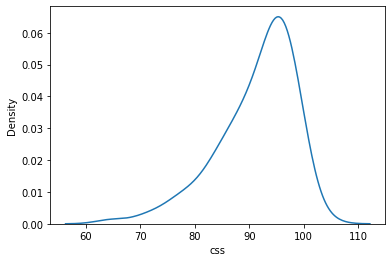

In [81]:
sns.kdeplot(max_comb_css['css'])

<AxesSubplot:xlabel='css', ylabel='Density'>

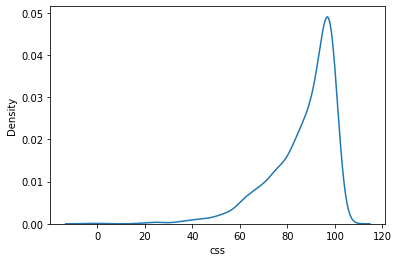

In [82]:
sns.kdeplot(max_mono_css['css'])

In [35]:
from sklearn.neighbors import KernelDensity
from tqdm import tqdm
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

def get_plotting_df(df):
    new_df = df
    X_plot = np.linspace(-30, 100, 130 * 3)

    new_df['cell_line_id'] = pd.Categorical(new_df['cell_line_name'])
    new_df['cell_line_id'] = new_df['cell_line_id'].cat.codes
    
    to_append = []
    result = pd.DataFrame(columns=['cell_line_id', 'samp_css_score', 'samp_css_density'])
    for cell_line_id, group in tqdm(df.groupby('cell_line_id')):
        kde = KernelDensity().fit(group['css'].values.reshape(-1, 1))
        log_density = kde.score_samples(X_plot.reshape(-1, 1))
        
        tmp_df = pd.DataFrame()
        tmp_df['cell_line_id'] = np.full(log_density.shape[0], cell_line_id)
        tmp_df['samp_css_score'] = X_plot
        tmp_df['samp_css_density'] = np.minimum(.07, np.exp(log_density))
        
        to_append.append(tmp_df)
    
    result = result.append(to_append)
    return result

def plot_3d(df, to_plot_df=True, angle=None):
    plot_df = get_plotting_df(df) if to_plot_df else df
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot_trisurf(plot_df['cell_line_id'], plot_df['samp_css_score'], plot_df['samp_css_density'],cmap=plt.cm.viridis, linewidth=.02)
    
    if angle is not None:
        ax.view_init(30, angle)
        
    plt.show()

In [6]:
mono_3d_df = get_plotting_df(mono_summ)

/Users/jarridr/opt/anaconda3/envs/my-rdkit-env/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/jarridr/opt/anaconda3/envs/my-rdkit-env/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
100%|██████████| 1929/1929 [00:09<00:00, 193.40it/s]


In [8]:
comb_3d_df = get_plotting_df(comb_summ)

/Users/jarridr/opt/anaconda3/envs/my-rdkit-env/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/jarridr/opt/anaconda3/envs/my-rdkit-env/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
100%|██████████| 112/112 [00:04<00:00, 23.61it/s]


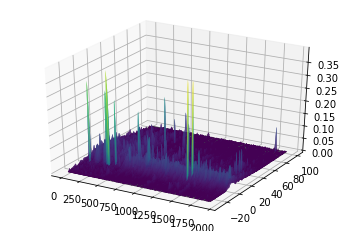

In [7]:
plot_3d(mono_3d_df, False)

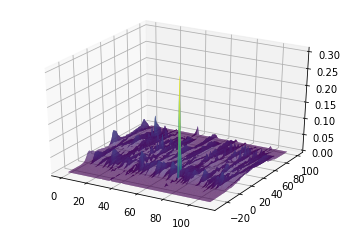

In [9]:
plot_3d(comb_3d_df, False)

In [12]:
comb_summ['cell_line_name'].to_frame()

,cell_line_name
0,560
1,560
2,560
3,560
4,560
...,...
466028,1097
466029,1097
466030,1097
466031,1097


In [23]:
comb_cell_lines = comb_summ['cell_line_name'].unique()
match_cell_line_mono_summ = mono_summ[mono_summ['cell_line_name'].isin(comb_cell_lines)]
comb_corr_cell_lines = comb_summ[comb_summ['cell_line_name'].isin(mono_summ['cell_line_name'].unique())]

/Users/jarridr/opt/anaconda3/envs/my-rdkit-env/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/jarridr/opt/anaconda3/envs/my-rdkit-env/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
100%|██████████| 92/92 [00:00<00:00, 141.83it/s]


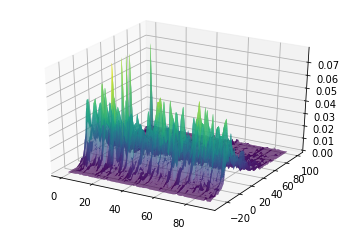

In [22]:
plot_3d(match_cell_line_mono_summ)

/Users/jarridr/opt/anaconda3/envs/my-rdkit-env/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/jarridr/opt/anaconda3/envs/my-rdkit-env/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
100%|██████████| 92/92 [00:03<00:00, 24.56it/s]


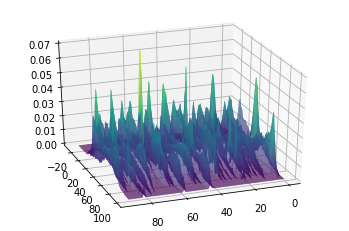

In [34]:
plot_3d(comb_corr_cell_lines)

In [36]:
comb_3d_df = get_plotting_df(comb_corr_cell_lines)

/Users/jarridr/opt/anaconda3/envs/my-rdkit-env/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/jarridr/opt/anaconda3/envs/my-rdkit-env/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
100%|██████████| 92/92 [00:03<00:00, 24.47it/s]


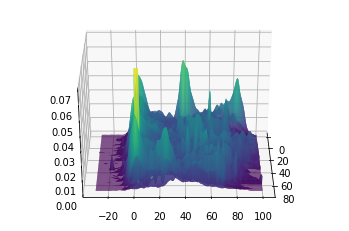

In [40]:
plot_3d(comb_3d_df, False, 0)

In [41]:
mono_3d_df = get_plotting_df(match_cell_line_mono_summ)

/Users/jarridr/opt/anaconda3/envs/my-rdkit-env/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/jarridr/opt/anaconda3/envs/my-rdkit-env/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
100%|██████████| 92/92 [00:00<00:00, 122.94it/s]


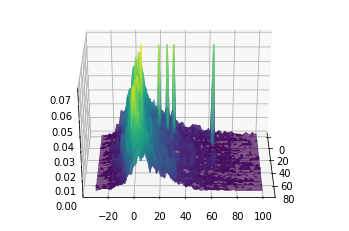

In [42]:
plot_3d(mono_3d_df, False, 0)

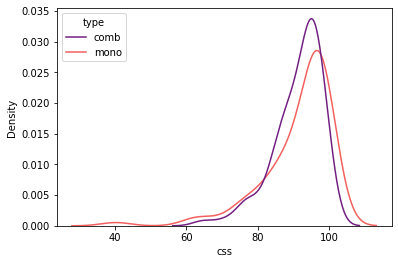

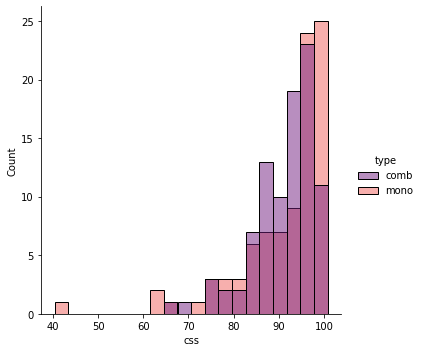

In [48]:
import seaborn as sns

comb_vals_for_cl = comb_corr_cell_lines.groupby(['cell_line_id'])['css'].apply(list).apply(np.array).reset_index()
mono_vals_for_cl = match_cell_line_mono_summ.groupby(['cell_line_id'])['css'].apply(list).apply(np.array).reset_index()

max_comb_css = comb_vals_for_cl['css'].apply(lambda x: x.max()).to_frame()
max_mono_css = mono_vals_for_cl['css'].apply(lambda x: x.max()).to_frame()

max_comb_css['type'] = 'comb'
max_mono_css['type'] = 'mono'

both_max = pd.concat((max_comb_css, max_mono_css))
sns.kdeplot(data=both_max, x='css', hue='type', palette='magma')
sns.displot(data=both_max, x='css', hue='type', palette='magma')

In [51]:
max_mono_css['css'].mean()

91.1495108695652

In [52]:
max_comb_css['css'].mean()

91.21508799218263

In [55]:
match_cell_line_mono_summ

,drug_row,drug_col,cell_line_name,study_name,css,cell_line_id
466040,NVP-AEW541,NaN,548,2,5.918,0
466046,NVP-AEW541,NaN,560,2,11.230,2
466048,NVP-AEW541,NaN,561,2,7.227,3
466049,NVP-AEW541,NaN,563,2,16.639,4
466050,NVP-AEW541,NaN,567,2,18.706,7
...,...,...,...,...,...,...
1116852,ERLOTINIB HYDROCHLORIDE,NaN,1948,19,7.460,91
1116854,ERLOTINIB HYDROCHLORIDE,NaN,1256,19,6.756,39
1116862,PACLITAXEL,NaN,1948,19,77.108,91
1116864,PACLITAXEL,NaN,622,19,95.768,9


In [56]:
comb_corr_cell_lines

,drug_row,drug_col,cell_line_name,study_name,css,cell_line_id
0,5-FU,ABT-888,560,17,30.8690,2
1,5-FU,ABT-888,560,17,27.4600,2
2,5-FU,ABT-888,560,17,29.9010,2
3,5-FU,ABT-888,560,17,24.0160,2
4,5-FU,AZD1775,560,17,66.8470,2
...,...,...,...,...,...,...
462406,942183-80-4,942183-80-4,1603,21,32.0520,62
462407,BGJ398 (NVP-BGJ398),942183-80-4,1603,21,49.6785,62
462408,CHEMBL3348822,942183-80-4,1603,21,31.3270,62
462409,BGJ398 (NVP-BGJ398),BGJ398 (NVP-BGJ398),1603,21,54.1200,62


In [57]:
comb_corr_cell_lines['cell_line_id'].unique()

array([ 2,  3,  4,  5, 11, 14, 16, 18, 21, 26, 27, 31, 34, 42, 44, 49, 50,
       51, 47, 52, 53, 54, 58, 59, 63, 65, 74, 75, 73, 79, 80, 81, 87, 89,
       90, 91, 45, 29, 12, 41, 28, 77, 71, 39, 67, 23, 48, 78, 43, 61, 56,
       86, 46, 69, 30,  9, 19, 76, 85, 25, 35, 36, 40,  7,  6, 66, 10,  0,
       20, 84, 37, 13, 57, 64, 88, 24, 17, 38,  8, 70, 15, 72, 68, 55, 82,
        1, 60, 32, 22, 33, 83, 62], dtype=int8)

In [60]:
summ

,block_id,drug_row,drug_col,cell_line_name,conc_r_unit,conc_c_unit,css,synergy_zip,synergy_bliss,synergy_loewe,synergy_hsa,ic50_row,ic50_col,ri_row,ri_col,css_row,css_col,S
0,1,5-FU,ABT-888,A2058,uM,uM,30.869,3.865915,6.256584,-2.951386,5.536903,5.126836,3.267734,11.471,-0.441,22.545,39.193,19.839
1,2,5-FU,ABT-888,A2058,uM,uM,27.460,8.247403,12.333896,3.125927,11.614215,5.126836,3.267734,11.471,-0.441,24.135,30.785,16.430
2,3,5-FU,ABT-888,A2058,uM,uM,29.901,6.063440,11.660209,2.452239,10.940528,5.126836,3.267734,11.471,-0.441,25.561,34.241,18.871
3,4,5-FU,ABT-888,A2058,uM,uM,24.016,-4.280231,5.145209,-4.062761,4.425528,5.126836,3.267734,11.471,-0.441,16.661,31.371,12.986
4,5,5-FU,AZD1775,A2058,uM,uM,66.847,12.284698,15.765467,10.409407,18.656340,5.126836,0.266027,11.471,25.164,76.501,57.193,30.212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1175215,1176497,VISMODEGIB,NaN,17-00448,uM,NaN,7.840,0.000000,0.000000,0.000000,0.000000,0.000017,0.000000,7.840,0.000,0.000,0.000,0.000
1175216,1176498,VOLASERTIB (BI 6727),NaN,17-00448,uM,NaN,22.762,0.000000,0.000000,0.000000,0.000000,3.051348,0.000000,22.762,0.000,0.000,0.000,0.000
1175217,1176499,VX-745,NaN,17-00448,uM,NaN,24.846,0.000000,0.000000,0.000000,0.000000,0.097768,0.000000,24.846,0.000,0.000,0.000,0.000
1175218,1176500,XAV-939,NaN,17-00448,uM,NaN,42.712,0.000000,0.000000,0.000000,0.000000,0.213554,0.000000,42.712,0.000,0.000,0.000,0.000
